# Analysis of the dataset after the dataprocessing step

What is the model actually getting?

In [31]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

In [1]:
import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

In [2]:
ds = datasets.load_from_disk('../data/dataset')['train'].select(range(10000))

In [3]:
ds.set_format('numpy')

In [4]:
ds

Dataset({
    features: ['meso_seq', 'thermo_seq', 'taxid', 'query_align_cov', 'subject_align_cov', 'bit_score', 'scaled_local_symmetric_percent_id', 'meso_seq_len', 'thermo_seq_len', 'seq_len_diff', 'meso_temp', 'thermo_temp', 'index', 'cluster', 'status_in_cluster'],
    num_rows: 10000
})

## Plots of length differences

Text(0.5, 1.0, 'Absolute difference in length')

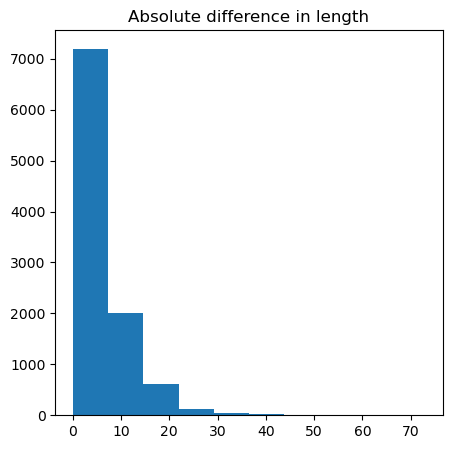

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(ds['seq_len_diff'])
ax.set_title('Absolute difference in length')

Text(0.5, 1.0, 'Normalized absolute difference in length')

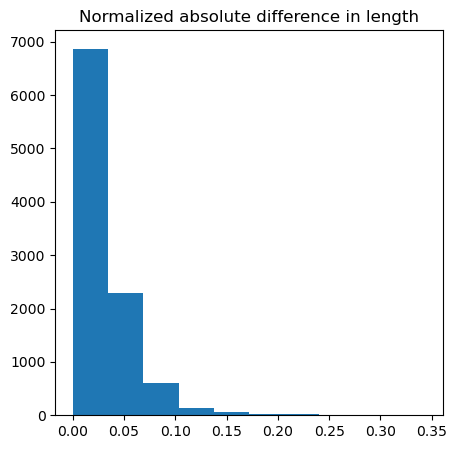

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
norm_len_diff = 2*np.array(ds['seq_len_diff'])/(ds['meso_seq_len']+ds['thermo_seq_len'])
ax.hist(norm_len_diff)
ax.set_title('Normalized absolute difference in length')

Text(0.5, 1.0, 'Normalized difference in length of thermo')

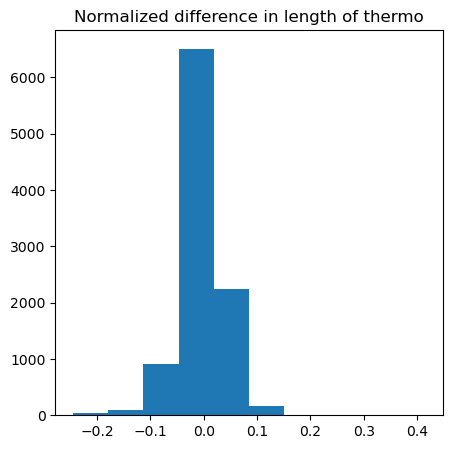

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
thermo_diff = (ds['thermo_seq_len'] - ds['meso_seq_len'])/ds['meso_seq_len']
ax.hist(thermo_diff)
ax.set_title('Normalized difference in length of thermo')

In [19]:
thermo_diff.mean()

-0.0023580521197379945

Thermo is lightly shorter on average

Text(0, 0.5, 'norm length difference')

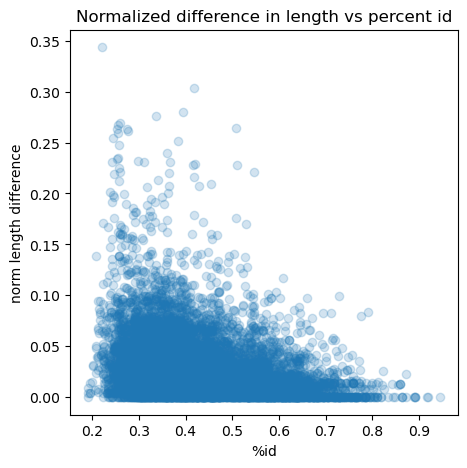

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(ds['scaled_local_symmetric_percent_id'], norm_len_diff, alpha=0.2)
ax.set_title('Normalized difference in length vs percent id')
ax.set_xlabel('%id')
ax.set_ylabel('norm length difference')

## Let's check if energy difference is actually negative for the thermophilic protein

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
sns.set_style('ticks')
sns.set_context('talk')

#### This is how we would normallly load it, if the job had finished, but gpus are taken so use existing replicates (see below)

In [2]:
with open('../data/proof_of_principle/training_data_estimated.json', 'r') as f:
    data = json.load(f)

In [3]:
data

{'meso_0': [-2.7588447893273416, 0.030266297619645558],
 'meso_1': [-2.638528647939591, 0.0194833865509087],
 'meso_2': [-2.7453439511264124, 0.02537205669764132],
 'meso_3': [-2.767499329027865, 0.029201674063421727],
 'meso_4': [-2.232223971165169, 0.08266339683404159],
 'meso_5': [-2.3833367607660327, 0.03457204386156655],
 'meso_6': [-2.5916607482918534, 0.03180038882681931],
 'meso_7': [-2.6514149738710313, 0.026792424526449636],
 'meso_8': [-2.3929427726705383, 0.04391123985872258],
 'meso_9': [-0.8728775482256098, 0.09835638962279412],
 'meso_10': [-2.1721181059306676, 0.04988744103948019],
 'meso_11': [-2.1821201812274964, 0.03606394241659327],
 'meso_12': [-2.614165592451761, 0.041143820985844834],
 'meso_13': [-2.5688142612803966, 0.020735037731325727],
 'meso_14': [-2.6288158742516767, 0.02505253324770615],
 'meso_15': [-2.6696055441366227, 0.044055381504203066],
 'meso_16': [-1.6381205033552444, 0.06604904104600727],
 'meso_17': [-2.1322772411523574, 0.051628598551468466],


#### make plot

In [4]:
new_data = {}
for k, v in data.items():
    num = int(k.split('_')[-1])
    type_ = k.split('_')[0]
    if num not in new_data:
        new_data[num] = [None, None, None]
    if type_ == 'meso':
        new_data[num][0] = v[0]
    elif type_ == 'thermo':
        new_data[num][1] = v[0]
    else:
        new_data[num][2] = v[0]
    

In [5]:
new_data

{0: [-2.7588447893273416, -2.866140041488167, -2.970316779295914],
 1: [-2.638528647939591, -2.3058082329460734, -2.655872553629765],
 2: [-2.7453439511264124, -2.9260109570111927, -2.9229553534037724],
 3: [-2.767499329027865, -2.8486336823153184, -3.0112744947543546],
 4: [-2.232223971165169, -2.6524014036228083, -2.808858023803561],
 5: [-2.3833367607660327, -2.294419014156658, -2.482877177899858],
 6: [-2.5916607482918534, -2.637011098761965, -2.6140633192198273],
 7: [-2.6514149738710313, -2.8081461029634216, -2.7240590745332813],
 8: [-2.3929427726705383, -2.3206897535411195, -2.347245997289995],
 9: [-0.8728775482256098, -0.9648441702662306, -0.9344163011211866],
 10: [-2.1721181059306676, -2.5062079266045836, -2.160599114034556],
 11: [-2.1821201812274964, -2.364178153772246, -1.328945699630433],
 12: [-2.614165592451761, -2.733930470305266, -2.5293097885993974],
 13: [-2.5688142612803966, -2.637011098761965, -2.623507894464199],
 14: [-2.6288158742516767, -2.637153159269354, -

In [6]:
vals = np.array([v for v in new_data.values()])
vals

array([[-2.75884479, -2.86614004, -2.97031678],
       [-2.63852865, -2.30580823, -2.65587255],
       [-2.74534395, -2.92601096, -2.92295535],
       [-2.76749933, -2.84863368, -3.01127449],
       [-2.23222397, -2.6524014 , -2.80885802],
       [-2.38333676, -2.29441901, -2.48287718],
       [-2.59166075, -2.6370111 , -2.61406332],
       [-2.65141497, -2.8081461 , -2.72405907],
       [-2.39294277, -2.32068975, -2.347246  ],
       [-0.87287755, -0.96484417, -0.9344163 ],
       [-2.17211811, -2.50620793, -2.16059911],
       [-2.18212018, -2.36417815, -1.3289457 ],
       [-2.61416559, -2.73393047, -2.52930979],
       [-2.56881426, -2.6370111 , -2.62350789],
       [-2.62881587, -2.63715316, -2.98010253],
       [-2.66960554, -2.7388131 , -2.75290181],
       [-1.6381205 , -1.81120901, -1.79196623],
       [-2.13227724, -2.25340822, -2.32497519],
       [-2.65459319, -2.65156839, -2.72923548],
       [-2.58950886, -2.8182769 , -2.83569424],
       [-2.411837  , -2.63715316, -2.657

In [7]:
true_diff = vals[:,1] - vals[:,0]
trans_diff = vals[:,2] - vals[:,0]

In [8]:
kde_data = pd.DataFrame({'True Difference': true_diff, 'Generated Difference': trans_diff}).melt()

<AxesSubplot: xlabel='value', ylabel='Density'>

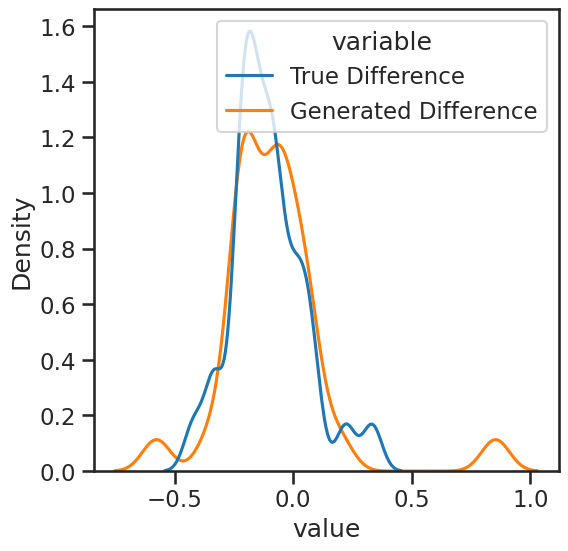

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=kde_data, x='value', hue='variable', bw_adjust=0.5
        )

In [11]:
true_diff

array([-0.10729525,  0.33272041, -0.18066701, -0.08113435, -0.42017743,
        0.08891775, -0.04535035, -0.15673113,  0.07225302, -0.09196662,
       -0.33408982, -0.18205797, -0.11976488, -0.06819684, -0.00833729,
       -0.06920756, -0.17308851, -0.12113098,  0.00302479, -0.22876804,
       -0.22531616,  0.04304122, -0.22436047, -0.21322773,  0.030608  ,
       -0.33144766,  0.22168499, -0.21827738, -0.15293921, -0.18523315])

In [14]:
stds = [v[1] for v in data.values()]

In [16]:
twosigma = np.mean(stds)*2

In [18]:
(true_diff < -1*twosigma).sum()

17

In [19]:
(trans_diff < -1*twosigma).sum()

14